In [1]:
import sys
sys.path.insert(0,'../')
from libs.ssl_dataloader import *
from libs.ssl_model import *
from libs.ssl_utils import *
from libs.eeg_utils import *
from braindecode.preprocessing import (
    preprocess, Preprocessor, create_fixed_length_windows)
from braindecode.datasets import BaseDataset, BaseConcatDataset, WindowsDataset
from braindecode.preprocessing.windowers import EEGWindowsDataset
from braindecode.datautil import load_concat_dataset
%load_ext autoreload
%autoreload 2
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

### Load raw data

In [7]:
datasets = []
releases = list(range(9,0,-1))
hbn_datasets = ['ds005514','ds005512','ds005511','ds005510','ds005509','ds005508','ds005507','ds005506','ds005505']
hbn_release_ds = dict(zip(releases,hbn_datasets))

In [9]:
ds1 = HBNDataset(hbn_release_ds[1], tasks=['RestingState'], data_path='.', num_workers=-1)
# ds2 = HBNDataset(hbn_release_ds[6], tasks=['RestingState'], num_workers=-1)

Scanning 1 directories... [PosixPath('ds005505')]
Current number of files: 0
Scanning 138 directories... ['ds005505/sub-NDARCJ475WJP', 'ds005505/sub-NDARPU897CM5', 'ds005505/sub-NDARKU278YRR', 'ds005505/sub-NDARXH597ML1', 'ds005505/sub-NDARFK610GY5', 'ds005505/sub-NDARCJ170CT9', 'ds005505/sub-NDARDL511UND', 'ds005505/sub-NDARYY218LU2', 'ds005505/sub-NDARXF203DCD', 'ds005505/sub-NDARXZ685TU4', 'ds005505/sub-NDARGR106TJB', 'ds005505/sub-NDAREN519BLJ', 'ds005505/sub-NDARHR443EHF', 'ds005505/sub-NDARXR965TFK', 'ds005505/sub-NDARUX216VHK', 'ds005505/sub-NDARBH024NH2', 'ds005505/sub-NDARUL224GN6', 'ds005505/sub-NDARXU253JHC', 'ds005505/sub-NDARZH761YA7', 'ds005505/sub-NDARCW094JCG', 'ds005505/sub-NDARAW320CGR', 'ds005505/sub-NDARJZ679KXJ', 'ds005505/sub-NDARTE785ZMJ', 'ds005505/sub-NDARWV405ZW0', 'ds005505/sub-NDARWP954GPJ', 'ds005505/sub-NDARRH407MEY', 'ds005505/sub-NDARVX337AC0', 'ds005505/sub-NDARLY585ZVN', 'ds005505/sub-NDARGB441VVD', 'ds005505/sub-NDARXG469XGP', 'ds005505/sub-NDARCZ947W

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


Adding  ds005505/sub-NDARKU278YRR/eeg/sub-NDARKU278YRR_task-contrastChangeDetection_run-1_eeg.set
Adding  ds005505/sub-NDARXH597ML1/eeg/sub-NDARXH597ML1_task-RestingState_eeg.set
Adding  ds005505/sub-NDARYY218LU2/eeg/sub-NDARYY218LU2_task-FunwithFractals_eeg.set
Adding  ds005505/sub-NDARYY218LU2/eeg/sub-NDARYY218LU2_task-DiaryOfAWimpyKid_eeg.set
Adding  ds005505/sub-NDARXH597ML1/eeg/sub-NDARXH597ML1_task-symbolSearch_eeg.set
Adding  ds005505/sub-NDARXH597ML1/eeg/sub-NDARXH597ML1_task-surroundSupp_run-1_eeg.set
Adding  ds005505/sub-NDARFK610GY5/eeg/sub-NDARFK610GY5_task-surroundSupp_run-1_eeg.set
Adding  ds005505/sub-NDARFK610GY5/eeg/sub-NDARFK610GY5_task-FunwithFractals_eeg.set
Adding  ds005505/sub-NDARFK610GY5/eeg/sub-NDARFK610GY5_task-DespicableMe_eeg.set
Adding  ds005505/sub-NDARCJ170CT9/eeg/sub-NDARCJ170CT9_task-ThePresent_eeg.set
Adding  ds005505/sub-NDARCJ170CT9/eeg/sub-NDARCJ170CT9_task-RestingState_eeg.set
Adding  ds005505/sub-NDARKU278YRR/eeg/sub-NDARKU278YRR_task-RestingState

[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    0.1s finished
/Users/arno/Python/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/Users/arno/Python/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/Users/arno/Python/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(f, preload=preload)
/Users/arno/Python/eeg-ssl/notebooks/../libs/ssl_dataloader.py:48: RuntimeWarning: Data will be preloaded. preload=Fa

In [10]:
all_ds = BaseConcatDataset([ds1])

### Save to disk using braindecode

In [38]:
all_ds.save('./ds005505_braindecode', overwrite=True)

Writing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/0/0-raw.fif
Closing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/0/0-raw.fif
[done]
Writing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/1/1-raw.fif
Closing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/1/1-raw.fif
[done]
Writing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/2/2-raw.fif
Closing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/2/2-raw.fif
[done]
Writing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/3/3-raw.fif
Closing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/3/3-raw.fif
[done]
Writing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/4/4-raw.fif
Closing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/4/4-raw.fif
[done]
Writing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/5/5-raw.fif
Closing /Users/arno/Python/eeg-ssl/notebooks/ds005505_braindecode/5/5-raw.fif
[done]
Writing /Users/arno/Py

#### Load raw data from braindecode

In [2]:
loaded_dataset = load_concat_dataset(path='./ds005505_braindecode', preload=False)
all_ds = loaded_dataset

### Visualize data sample

Effective window size : 4.096 (s)


/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_2715/4294438965.py:2: UserWarning: Zero value in spectrum for channel Cz
  fig = raw.compute_psd(fmax=70).plot(
/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_2715/4294438965.py:2: UserWarning: Infinite value in PSD for channel Cz.
These channels might be dead.
  fig = raw.compute_psd(fmax=70).plot(
/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


(array([[0.00023556, 0.00022842, 0.00022663, ..., 0.003275  , 0.00331571,
        0.00337169]]), array([ 10.   ,  10.002,  10.004, ..., 347.112, 347.114, 347.116]))
-0.005152976549489985 0.010950747042664521


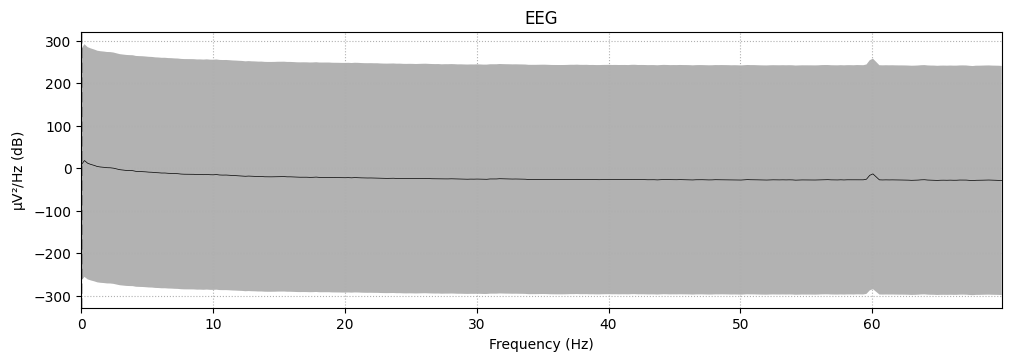

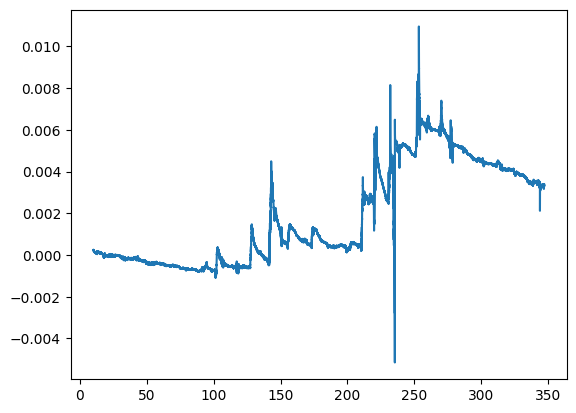

In [3]:
raw = all_ds.datasets[1].raw
fig = raw.compute_psd(fmax=70).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([10, 500])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)
x = raw_selection[1]
y = raw_selection[0].T
print(np.min(y),np.max(y))
plt.figure()
plt.plot(x, y)
plt.show()

### Preprocess data

In [ ]:
from numpy import multiply
sampling_rate = 250 # resample to follow the tutorial sampling rate
high_cut_hz = 30
# Factor to convert from V to uV
factor = 1e4
preprocessors = [
    Preprocessor(lambda data: multiply(data, factor)),  # Convert from V to uV
    Preprocessor('crop', tmin=10),  # crop first 10 seconds as begining of noise recording
    Preprocessor('resample', sfreq=sampling_rate),
    Preprocessor('notch_filter', freqs=(60, 120)),
    Preprocessor('filter', l_freq=None, h_freq=high_cut_hz, n_jobs=-1)
]

# Transform the data
preprocess(all_ds, preprocessors)

In [ ]:
all_ds.save('./ds005505_braindecode_preprocessed')

#### Load preprocessed data using braindecode

In [23]:
loaded_dataset = load_concat_dataset(path='./ds005505_braindecode_preprocessed', preload=False)
all_ds = loaded_dataset
all_ds.datasets[0].description

task             RestingState
session                      
run                          
subject          NDARRD326KB9
sfreq                     500
age                   13.0092
sex                         F
ehq_total               57.83
p_factor               -0.648
attention              -0.055
internalizing          -0.051
externalizing          -0.109
dtype: object

Effective window size : 8.192 (s)


(array([[37.09259991, 37.09679191, 37.09481991, ..., 36.60017591,
        36.65189191, 36.71610791]]), array([10.   , 10.004, 10.008, ..., 99.988, 99.992, 99.996]))
35.91583190932124 41.60955589494597


/tmp/ipykernel_2313235/1978082691.py:2: UserWarning: Zero value in spectrum for channels E19, E86
  fig = raw.compute_psd(fmax=70).plot(
/tmp/ipykernel_2313235/1978082691.py:2: UserWarning: Infinite value in PSD for channels E19, E86.
These channels might be dead.
  fig = raw.compute_psd(fmax=70).plot(


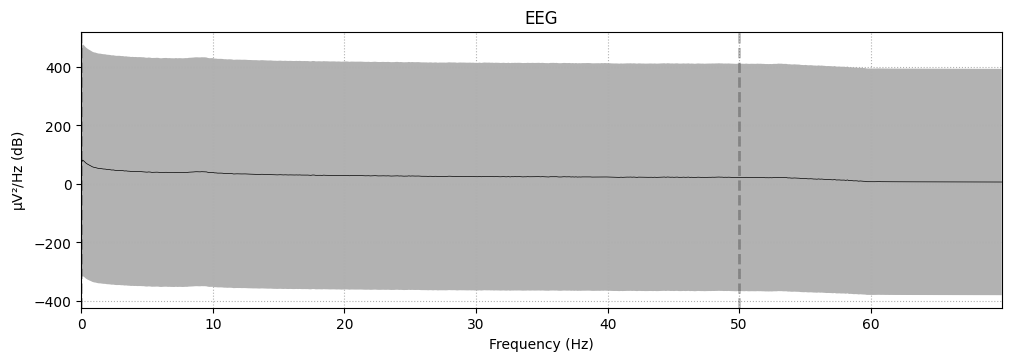

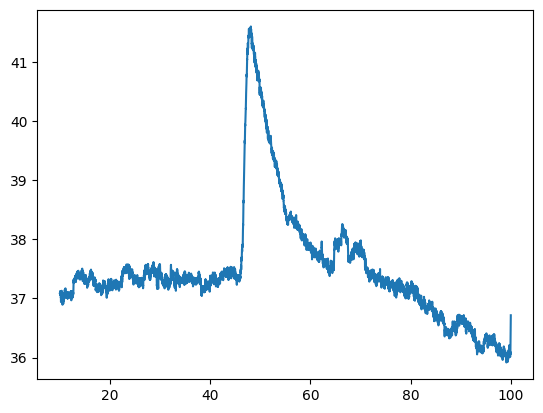

In [22]:
raw = all_ds.datasets[11].raw
fig = raw.compute_psd(fmax=70).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([10, 100])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)
x = raw_selection[1]
y = raw_selection[0].T
print(np.min(y),np.max(y))
plt.figure()
plt.plot(x, y)
plt.show()

### Set labels

In [4]:
target_name = 'age'
for ds in all_ds.datasets:
    ds.target_name = target_name
    
all_ds.datasets[0].target_name

'age'

### Segment data windows

In [5]:
window_len_s = 10
fs = all_ds.datasets[0].raw.info['sfreq']
print('sampling rate', fs)
window_len_samples = int(fs * window_len_s)
window_stride_samples = int(fs * window_len_s) # non-overlapping
windows_ds = create_fixed_length_windows(
    all_ds, start_offset_samples=0, stop_offset_samples=None,
    window_size_samples=window_len_samples,
    window_stride_samples=window_stride_samples, drop_last_window=True,
    preload=False)

sampling rate 500.0


In [ ]:
from sklearn.preprocessing import scale as standard_scale
preprocess(windows_ds, [Preprocessor(standard_scale, channel_wise=True)]) # modify in place

In [28]:
windows_ds.save('./ds005505_braindecode_preprocessed_windowed_scaled')

Writing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/0/0-raw.fif


Closing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/0/0-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/1/1-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/1/1-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/2/2-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/2/2-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/3/3-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/3/3-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/4/4-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/4/4-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/5/5-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data/hbn_preprocessed_windowed_scaled/5/5-raw.fif
[done]
W

#### Load segmented data windows

In [6]:
window_len_s = 10

In [6]:
windows_ds = load_concat_dataset(path='data/hbn_preprocessed_windowed_scaled', preload=False)

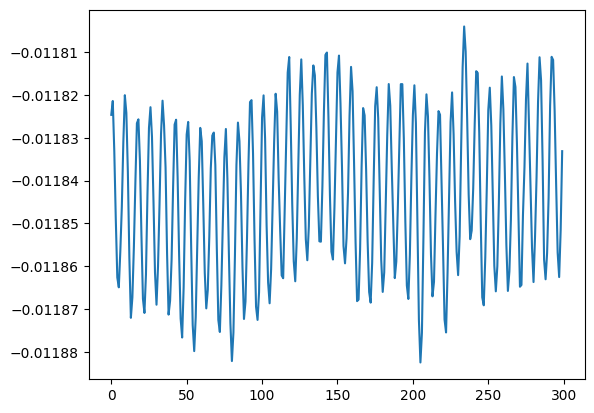

In [7]:
sample_range = list(range(300))
plt.plot(sample_range, windows_ds[100][0][0,sample_range])
plt.show()

### Train-test split

In [8]:
random_state = 87
n_jobs = -1

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from braindecode.datasets import BaseConcatDataset

subjects = np.unique(windows_ds.description['subject'])
subj_train, subj_test = train_test_split(
    subjects, test_size=0.4, random_state=random_state)
subj_valid, subj_test = train_test_split(
    subj_test, test_size=0.5, random_state=random_state)

In [10]:
# class RelativePositioningDataset(BaseConcatDataset):
#     """BaseConcatDataset with __getitem__ that expects 2 indices and a target.
#     """

#     def __init__(self, list_of_ds):
#         super().__init__(list_of_ds)
#         self.return_pair = True

#     def __getitem__(self, index):
#         if self.return_pair:
#             ind1, ind2, y = index
#             return (super().__getitem__(ind1)[0],
#                     super().__getitem__(ind2)[0]), y
#         else:
#             return super().__getitem__(index)

#     @property
#     def return_pair(self):
#         return self._return_pair

#     @return_pair.setter
#     def return_pair(self, value):
#         self._return_pair = value

split_ids = {'train': subj_train, 'valid': subj_valid, 'test': subj_test}
splitted = dict()
for name, values in split_ids.items():
    splitted[name] = RelativePositioningDataset(
        [ds for ds in windows_ds.datasets
         if ds.description['subject'] in values])


In [11]:
print('train datasets', len(splitted['train'].datasets))
print('validation datasets', len(splitted['valid'].datasets))
print('test datasets', len(splitted['test'].datasets))
splitted['train'].get_metadata()

train datasets 81
validation datasets 27
test datasets 28


/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_dfs)


,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,task,session,run,subject,sfreq,age,sex,ehq_total,p_factor,attention,internalizing,externalizing
0,0,0,5000,5.2195,RestingState,,,NDARCJ475WJP,500,5.2195,F,86.71,1.084,0.148,-0.466,0.144
1,1,5000,10000,5.2195,RestingState,,,NDARCJ475WJP,500,5.2195,F,86.71,1.084,0.148,-0.466,0.144
2,2,10000,15000,5.2195,RestingState,,,NDARCJ475WJP,500,5.2195,F,86.71,1.084,0.148,-0.466,0.144
3,3,15000,20000,5.2195,RestingState,,,NDARCJ475WJP,500,5.2195,F,86.71,1.084,0.148,-0.466,0.144
4,4,20000,25000,5.2195,RestingState,,,NDARCJ475WJP,500,5.2195,F,86.71,1.084,0.148,-0.466,0.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,34,170000,175000,12.5712,RestingState,,,NDARET550NXC,500,12.5712,M,-40.02,-0.149,0.426,-0.149,0.131
35,35,175000,180000,12.5712,RestingState,,,NDARET550NXC,500,12.5712,M,-40.02,-0.149,0.426,-0.149,0.131
36,36,180000,185000,12.5712,RestingState,,,NDARET550NXC,500,12.5712,M,-40.02,-0.149,0.426,-0.149,0.131
37,37,185000,190000,12.5712,RestingState,,,NDARET550NXC,500,12.5712,M,-40.02,-0.149,0.426,-0.149,0.131


In [12]:
from braindecode.samplers import RelativePositioningSampler

sfreq = 500
tau_pos, tau_neg = int(sfreq * 10), int(sfreq * 2 * 10)
n_examples_train = 250 * len(splitted['train'].datasets)
n_examples_valid = 250 * len(splitted['valid'].datasets)
n_examples_test = 250 * len(splitted['test'].datasets)

train_sampler = RelativePositioningSampler(
    splitted['train'].get_metadata(), tau_pos=tau_pos, tau_neg=tau_neg,
    n_examples=n_examples_train, same_rec_neg=False, random_state=random_state)
valid_sampler = RelativePositioningSampler(
    splitted['valid'].get_metadata(), tau_pos=tau_pos, tau_neg=tau_neg,
    n_examples=n_examples_valid, same_rec_neg=False,
    random_state=random_state).presample()
test_sampler = RelativePositioningSampler(
    splitted['test'].get_metadata(), tau_pos=tau_pos, tau_neg=tau_neg,
    n_examples=n_examples_test, same_rec_neg=False,
    random_state=random_state).presample()

/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_dfs)
/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_dfs)
/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/braindecode/datasets/base.py:514: FutureWarning: The behavior of DataFrame concatenation with empty or

### Specify and train model with Torch Lightning

In [13]:
import lightning as L
import torch
from torch import nn
from braindecode.util import set_random_seeds
from braindecode.models import ShallowFBCSPNet
# define the LightningModule
class LitSSL(L.LightningModule):
    def __init__(self, n_channels, sfreq, input_size_samples, window_len_s, emb_size, dropout=0.5):
        super().__init__()
        self.emb = self.create_embedding_layer(n_channels, sfreq, input_size_samples, window_len_s) #VGGSSL()
        self.pooling = nn.AdaptiveAvgPool2d(32)
        self.clf = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(1024, emb_size),
            nn.Dropout(dropout),
            nn.Linear(emb_size, 1)
        )

    def create_embedding_layer(self, n_channels, sfreq, input_size_samples, window_len_s):
        return ShallowFBCSPNet(
            n_chans=n_channels,
            sfreq=sfreq,
            n_outputs=emb_size,
            # n_conv_chs=16,
            n_times=input_size_samples,
            input_window_seconds=window_len_s,
            # dropout=0,
            # apply_batch_norm=True,
        )

    def embed(self, x):
        z = self.clf[1](self.pooling(self.emb(x)).flatten(start_dim=1))
        return z

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        self.emb.train()
        X, y = batch
        x1, x2 = X[0], X[1]
        z1, z2 = self.emb(x1), self.emb(x2)
        z = self.pooling(torch.abs(z1 - z2)).flatten(start_dim=1)

        loss = nn.functional.binary_cross_entropy_with_logits(self.clf(z).flatten(), y)

        # Logging to TensorBoard (if installed) by default
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        from sklearn import linear_model
        regr = linear_model.LinearRegression()
        X, Y, _ = batch
        z = self.embed(X).detach().cpu().numpy()
        Y = Y.detach().cpu().numpy()
        isnan = np.isnan(Y)
        embs = z[~isnan]
        labels = Y[~isnan]
        regr.fit(embs, labels)
        score = regr.score(embs, labels) 
        self.log('val_score', score)
        

    def test_step(self, batch, batch_idx):
        # this is the test loop
        X, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        test_loss = F.mse_loss(x_hat, x)
        self.log("test_loss", test_loss)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

# Extract number of channels and time steps from dataset
n_channels, input_size_samples = windows_ds[0][0].shape
emb_size = 100
classes = list(range(5))

model = LitSSL(n_channels, sfreq, input_size_samples, window_len_s, emb_size)

/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [14]:
train_loader = DataLoader(splitted['train'], sampler=train_sampler, batch_size=128, num_workers=4)
splitted['valid'].return_pair = False
val_loader = DataLoader(splitted['valid'], batch_size=128, num_workers=4)
# train the model (hint: here are some helpful Trainer arguments for rapid idea iteration)
trainer = L.Trainer(max_epochs=1, accelerator='cpu')
trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=val_loader) #, ckpt_path="lightning_logs/version_10/checkpoints/epoch=199-step=20000.ckpt")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type              | Params | Mode 
------------------------------------------------------
0 | emb     | ShallowFBCSPNet   | 327 K  | eval 
1 | pooling | AdaptiveAvgPool2d | 0      | train
2 | clf     | Sequential        | 102 K  | train
------------------------------------------------------
430 K     Trainable params
0         Non-trainable params
430 K     Total params
1.721     Total estimated model params size (MB)
10        Modules in train mode
11        Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


/Users/arno/Python/eeg-ssl/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 0:   6%|▌         | 9/159 [02:34<42:54,  0.06it/s, v_num=11]

In [64]:
# Load the TensorBoard notebook extension
%load_ext tensorboard